In [1]:
from setting import *

%matplotlib inline

In [2]:
tickers = ['KS11']
names = ['kospi']

In [3]:
data = getHistoryByFdr(tickers, names)
print('data \n', data)

assets = data.resample('M').last()
assets['CASH'] = pow(1.03, 1/12)
assets['CASH'] = assets['CASH'].shift(1, fill_value=1.0)
assets['CASH'] = assets['CASH'].cumprod()
print('assets shape({})\n'.format(assets.shape), assets.head(30))

data 
                   kospi
Date                   
1996-12-11   704.679993
1996-12-12   689.380005
1996-12-13   689.070007
1996-12-16   673.919983
1996-12-17   663.349976
...                 ...
2022-11-24  2441.330078
2022-11-25  2437.860107
2022-11-28  2408.270020
2022-11-29  2433.389893
2022-12-01  2491.959961

[6401 rows x 1 columns]
assets shape((313, 2))
                  kospi      CASH
Date                            
1996-12-31  651.219971  1.000000
1997-01-31  685.840027  1.002466
1997-02-28  676.530029  1.004939
1997-03-31  677.340027  1.007417
1997-04-30  703.229980  1.009902
1997-05-31  746.359985  1.012392
1997-06-30  745.400024  1.014889
1997-07-31  726.119995  1.017392
1997-08-31  704.270020  1.019901
1997-09-30  647.109985  1.022417
1997-10-31  470.790009  1.024938
1997-11-30  411.910004  1.027466
1997-12-31  375.149994  1.030000
1998-01-31  558.330017  1.032540
1998-02-28  548.419983  1.035087
1998-03-31  481.040009  1.037640
1998-04-30  421.220001  1.040199
1998-

In [6]:
weights = getWeightByAvgMomentumScore(assets['kospi'].to_frame())
print('weights \n', weights)
averageMomentum = Target_Weight_BT(assets, weights, 'Average Momentum')

weights 
                kospi
Date                
1996-12-31       NaN
1997-01-31       NaN
1997-02-28       NaN
1997-03-31       NaN
1997-04-30       NaN
...              ...
2022-08-31  0.166667
2022-09-30  0.000000
2022-10-31  0.083333
2022-11-30  0.250000
2022-12-31  0.500000

[313 rows x 1 columns]


In [7]:
weights = getWeightByAbsoluteMomentum(assets, 3)
print('weights \n', weights)
momentum_3 = Target_Weight_BT(assets, weights, '3 months momentum')

momentum 
                kospi      CASH
Date                          
1996-12-31       NaN       NaN
1997-01-31       NaN       NaN
1997-02-28       NaN       NaN
1997-03-31  0.040109  0.007417
1997-04-30  0.025356  0.007417
1997-05-31  0.103218  0.007417
1997-06-30  0.100481  0.007417
1997-07-31  0.032550  0.007417
1997-08-31 -0.056394  0.007417
1997-09-30 -0.131862  0.007417
1997-10-31 -0.351636  0.007417
1997-11-30 -0.415125  0.007417
1997-12-31 -0.420269  0.007417
1998-01-31  0.185943  0.007417
1998-02-28  0.331407  0.007417
1998-03-31  0.282260  0.007417
1998-04-30 -0.245572  0.007417
1998-05-31 -0.386182  0.007417
1998-06-30 -0.380758  0.007417
1998-07-31 -0.184915  0.007417
1998-08-31 -0.078632  0.007417
1998-09-30  0.041762  0.007417
1998-10-31  0.120642  0.007417
1998-11-30  0.456925  0.007417
1998-12-31  0.812516  0.007417
1999-01-31  0.485198  0.007417
1999-02-28  0.150881  0.007417
1999-03-31  0.100487  0.007417
1999-04-30  0.317029  0.007417
1999-05-31  0.415260  0.0074

In [8]:
index = Buy_n_Hold_BT(data[names[0]].to_frame(), names[0])

In [13]:
report = bt.run(index, momentum_3, averageMomentum)

Stat                 kospi       3 months momentum    Average Momentum
-------------------  ----------  -------------------  ------------------
Start                1997-01-31  1997-01-31           1997-01-31
End                  2022-10-31  2022-10-31           2022-10-31
Risk-free rate       0.00%       0.00%                0.00%

Total Return         234.42%     1148.31%             397.93%
Daily Sharpe         -           -                    -
Daily Sortino        -           -                    -
CAGR                 4.80%       10.30%               6.43%
Max Drawdown         -60.04%     -36.60%              -29.01%
Calmar Ratio         0.08        0.28                 0.22

MTD                  6.41%       0.25%                0.00%
3m                   -1.67%      0.99%                -2.07%
6m                   -16.83%     1.14%                -3.53%
YTD                  -19.21%     2.15%                -6.38%
1Y                   -25.26%     2.65%                -9.14%
3Y (a

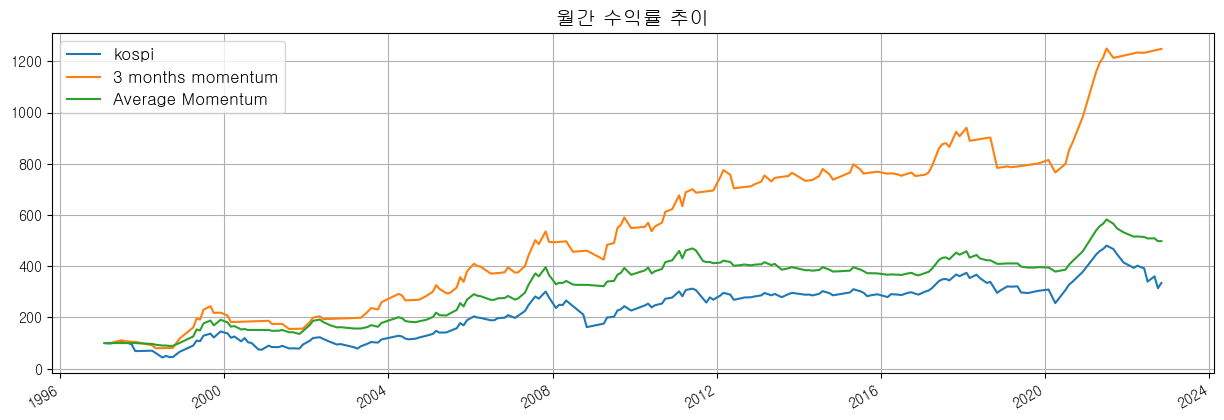

In [14]:
report.plot()
plt.title('월간 수익률 추이')

print(report.display())
print(report.display_monthly_returns())